# ML MODEL CREATION

Importing the necessary libraries

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Importing the Data

In [27]:
df = pd.read_excel("Data/ML_Data.xlsx")

Splitting training and testing Data

In [28]:
# Splitting the dataset into the features and the target variable
X = df.drop('depression_status', axis=1)  # Features
y = df['depression_status']  # Target variable

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training the models

In [49]:
# Set random seed for reproducibility
np.random.seed(42)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(penalty='l2', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Neural Networks': MLPClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Naive Bayes': GaussianNB() 

}

# Prepare cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Collect results
results = []

for name, model in models.items():
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=['accuracy', 'precision', 'recall', 'f1'], return_train_score=False)
    results.append({
        'Model': name,
        'Accuracy': np.mean(cv_results['test_accuracy']),
        'Precision': np.mean(cv_results['test_precision']),
        'Recall': np.mean(cv_results['test_recall']),
        'F1 Score': np.mean(cv_results['test_f1'])
    })

# Create DataFrame to display results
results_df = pd.DataFrame(results)
results_df

c:\Users\Acer\Desktop\Final Year Research\Depression_Research\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\Desktop\Final Year Research\Depression_Research\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\Desktop\Final Year Research\Depression_Research\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\Desktop\Final Year Research\Depression_Research\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimize

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.700893,0.695988,0.706855,0.700195
1,Random Forest,0.792460,0.800972,0.770363,0.784725
2,Neural Networks,0.789187,0.766856,0.827823,0.795724
3,Gradient Boosting,0.751290,0.761811,0.725202,0.741920
4,Naive Bayes,0.729365,0.719949,0.738710,0.727812


Feature Selection

In [41]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    font = {'weight': 'bold', 'size': 12}
    #Define size of bar plot
    plt.figure(figsize=(30,30))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'Feature Importance', fontsize=30)
    xlabel=plt.xlabel('FEATURE IMPORTANCE')
    xlabel.set_size(20)
    ylabel=plt.ylabel('FEATURE NAMES')
    ylabel.set_size(20)
    

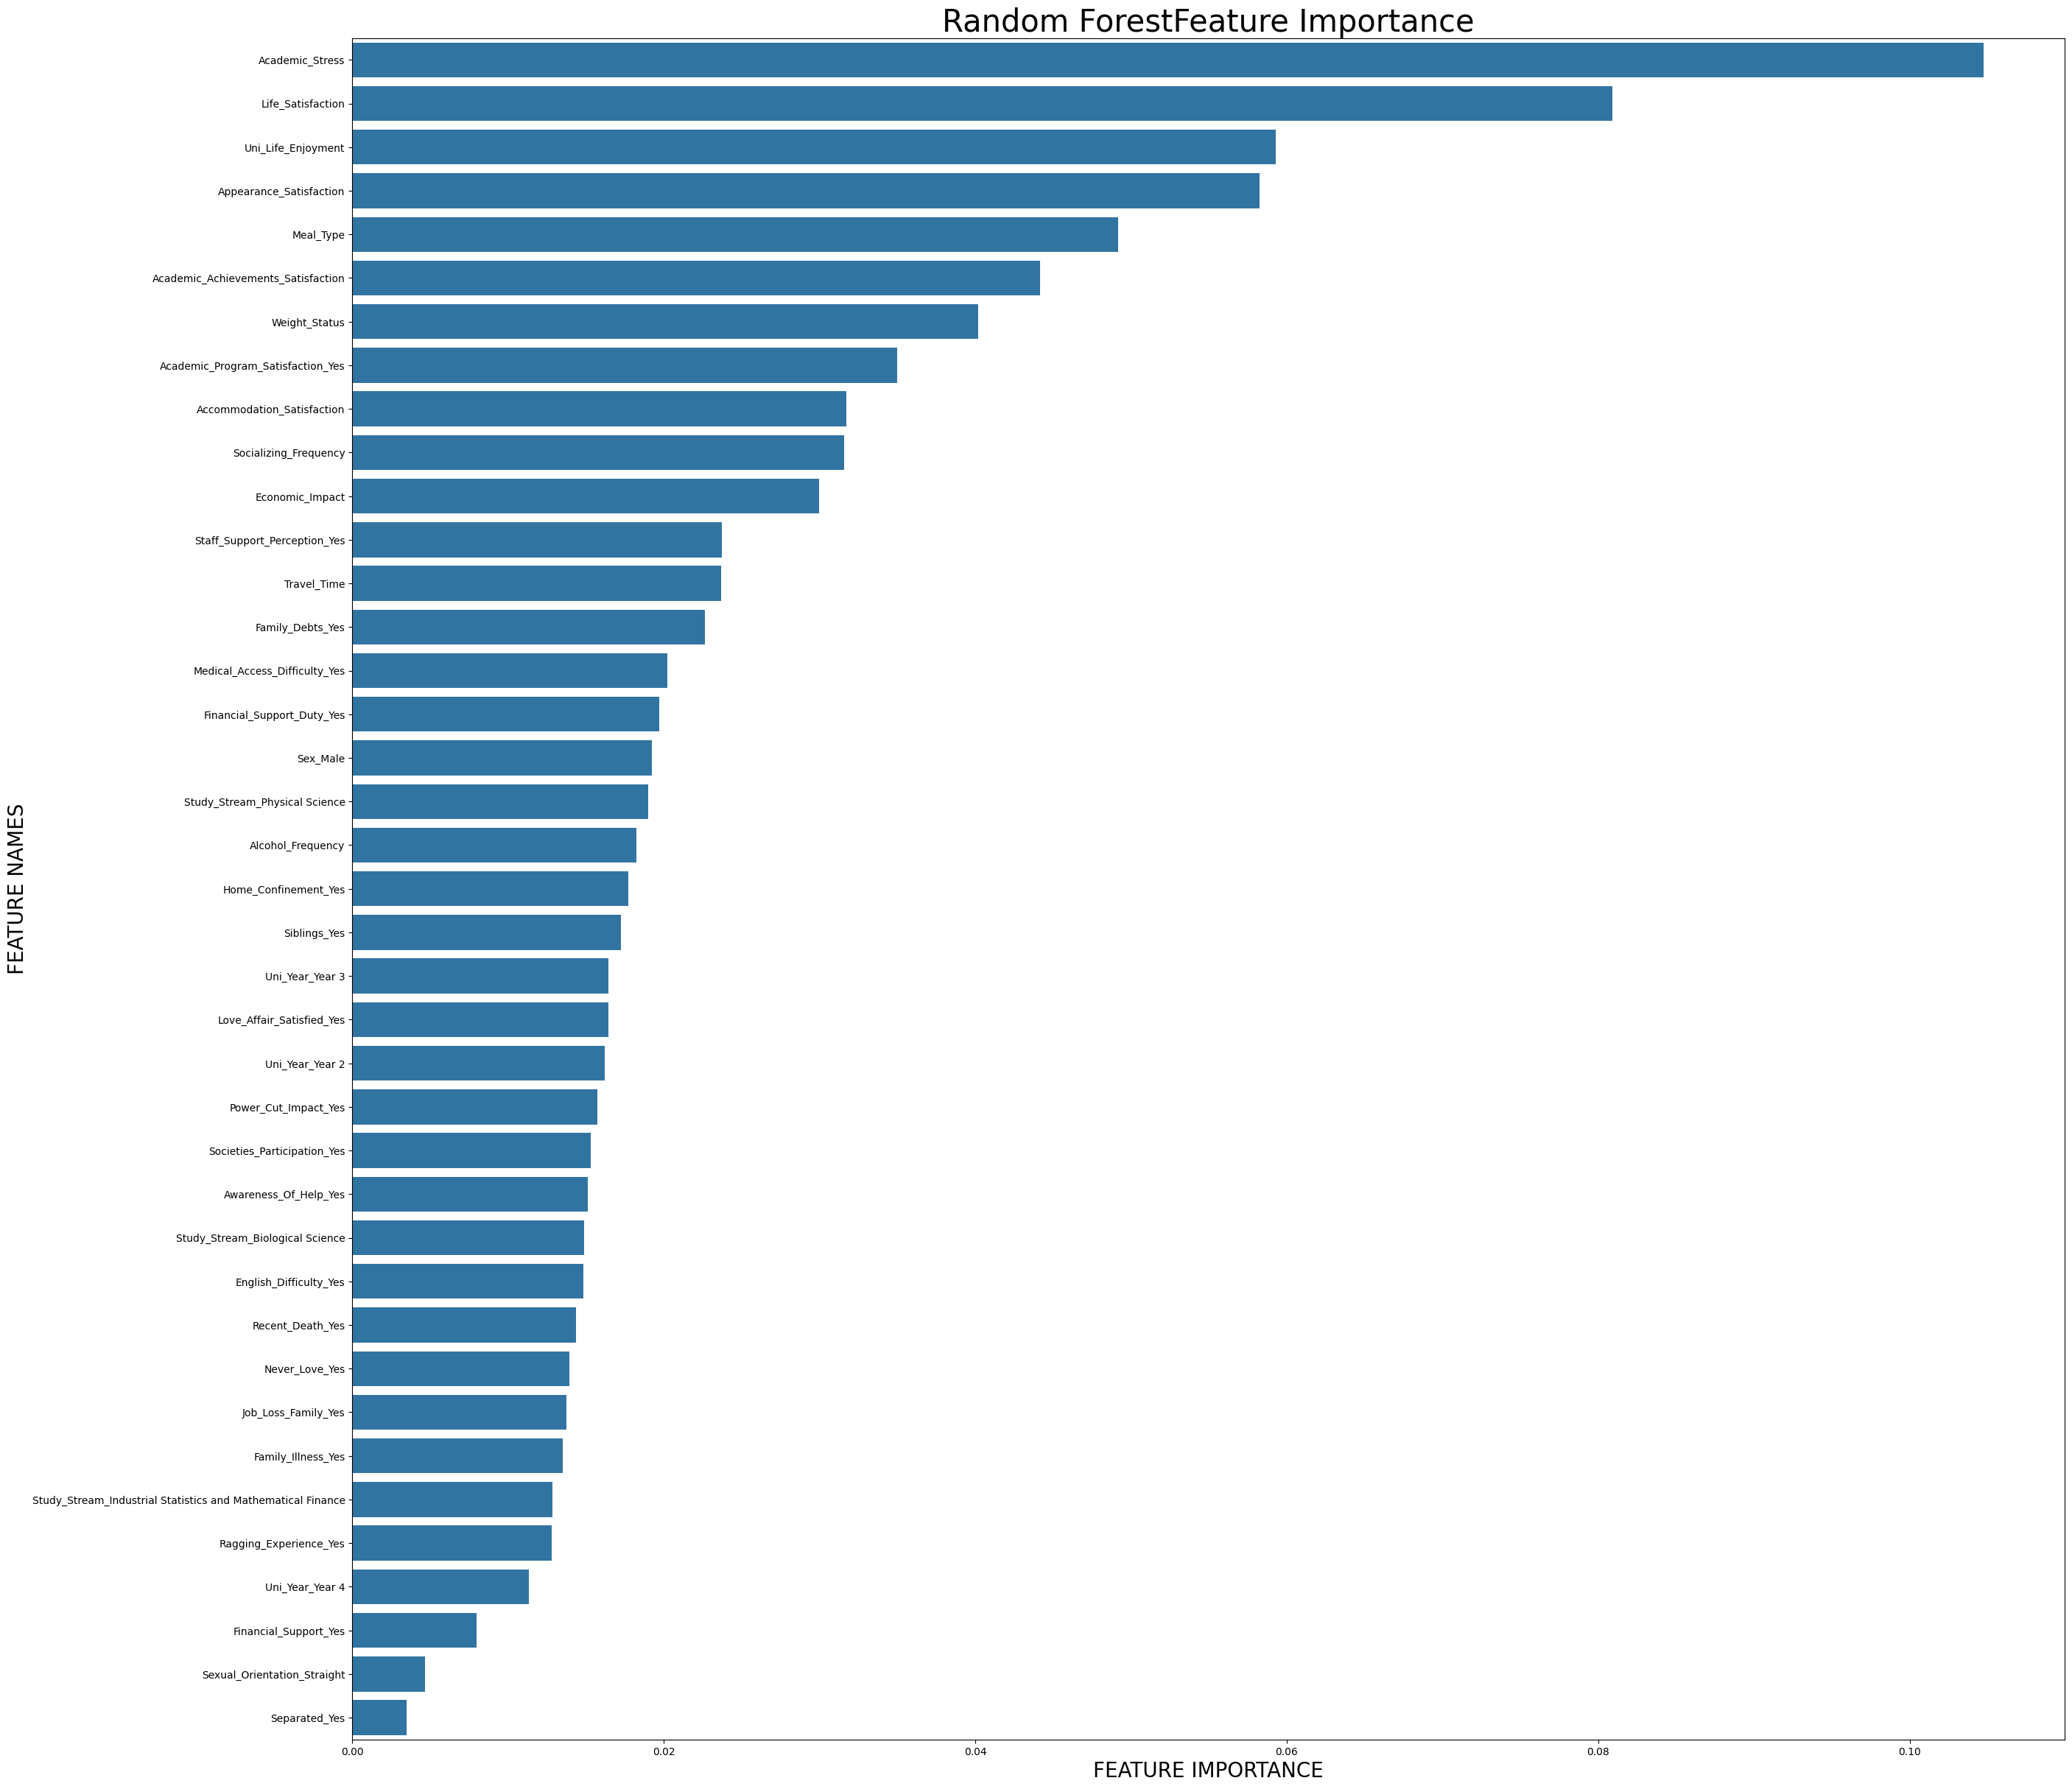

In [43]:
model=RandomForestClassifier(random_state=42, n_estimators=500)
model.fit(X_train,y_train)
plot_feature_importance(model.feature_importances_, X_train.columns,'Random Forest')

Hyperparameter Tuning

In [48]:
# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Use the best estimator for further predictions
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.80
